In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_df = pd.read_csv("boston_housing (1).csv")

In [3]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [4]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


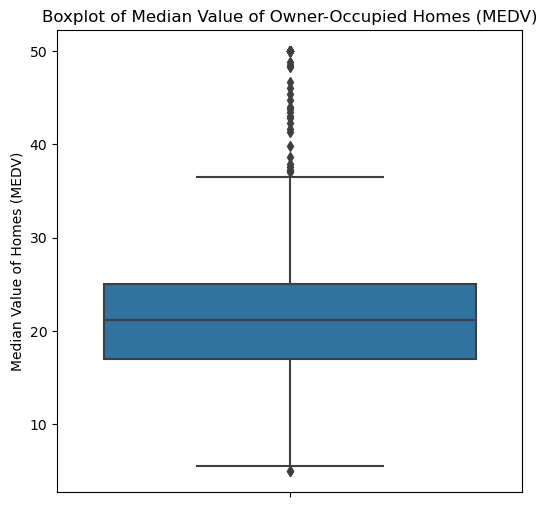

In [19]:
#Question 1: For the 'Median value of owner-occupied homes' provide a boxplot.

# Create the boxplot for MEDV

plt.figure(figsize=(6, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.show()

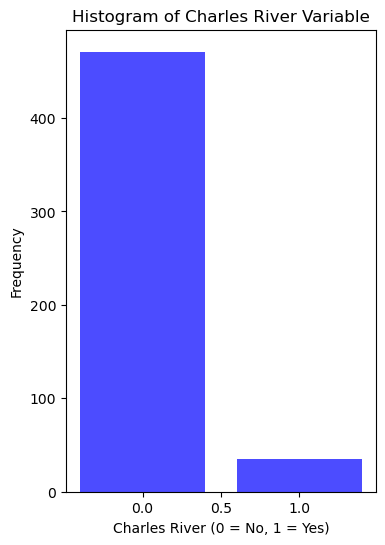

In [20]:
#Question 2: Provide a histogram for the Charles River variable

# Assuming the Charles River variable column is named 'CHAS'

chas_counts = boston_df['CHAS'].value_counts()

# Plotting the histogram

plt.figure(figsize=(4, 6))
plt.bar(chas_counts.index, chas_counts.values, color='blue', alpha=0.7)
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.title('Histogram of Charles River Variable')
plt.show()



C:\Users\rajul\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


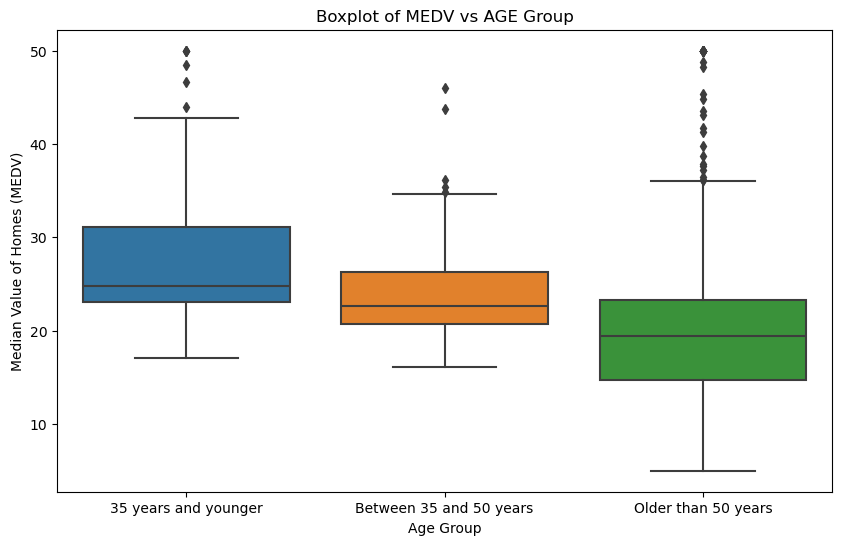

In [21]:
"""Question 3: Provide a boxplot for the MEDV variable vs the AGE variable -
Discretize the age variable into three groups of 35 years and younger,
between 35 and 50 years and older"""

# Discretize the AGE variable into three groups

age_bins = [0, 35, 50, 100]
age_labels = ['35 years and younger', 'Between 35 and 50 years', 'Older than 50 years']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

# Create the boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.xlabel('Age Group')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('Boxplot of MEDV vs AGE Group')
plt.show()

<Figure size 1000x600 with 0 Axes>

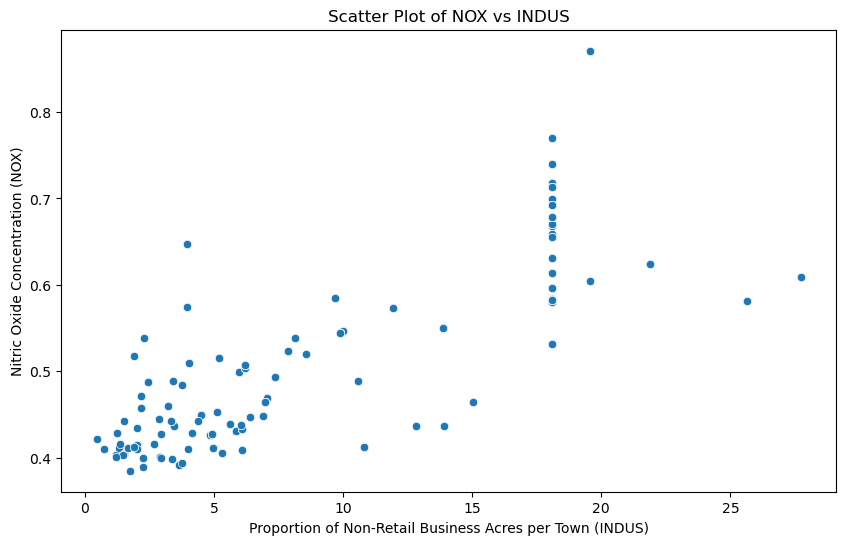

In [23]:
"""Question 4: Provide a scatter plot to show the relationship between
Nitric oxide concentrations and the proportion of non-retail
business acres per town. What can you say about the relationship?"""

# Create the scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.title('Scatter Plot of NOX vs INDUS')
plt.show()

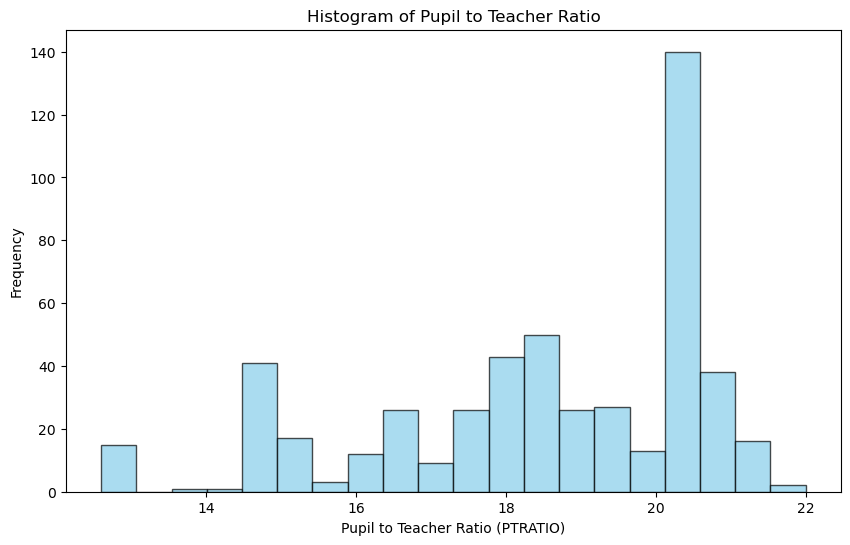

In [24]:
#Question 5: Create a histogram for the pupil to teacher ratio variable.

# Assuming the pupil-to-teacher ratio variable column is named 'PTRATIO'
# Create the histogram

plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.show()

Pearson correlation coefficient between INDUS and NOX: 0.7636514469209151


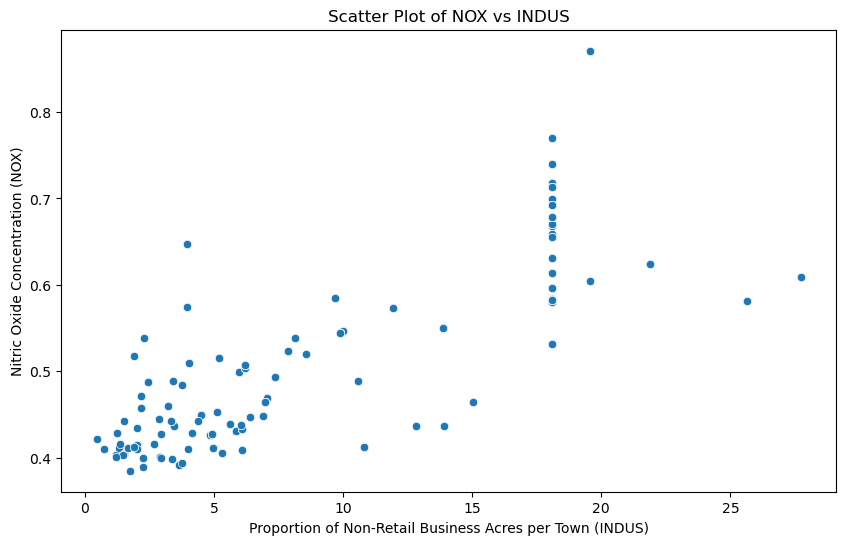

In [27]:
#Question 6: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


# Calculate the Pearson correlation coefficient

pearson_corr = boston_df['INDUS'].corr(boston_df['NOX'])
print(f'Pearson correlation coefficient between INDUS and NOX: {pearson_corr}')

# Create the scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.title('Scatter Plot of NOX vs INDUS')
plt.show()